In [4]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Bank Transaction Analysis jan Project.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date', ascending=False)

df['Signed Amount'] = np.where(df['Transaction Type'] == 'Credit', df['Amount'], -df['Amount'])

df['Balance'] = df['Signed Amount'].cumsum()

df['Month'] = df['Date'].dt.to_period('M')
df["Year"] = df['Date'].dt.to_period('Y')

print("🟢 Data Loaded and Preprocessed Successfully!\n")
print(df.head(20))

🟢 Data Loaded and Preprocessed Successfully!

         Date          Description   Category  Amount Transaction Type  \
24 2025-01-25      Tea Boy - Foods      Bills    2365            Debit   
9  2025-01-25   Food & Snacks shop      Bills    6000            Debit   
19 2025-01-25      Online Shopping   Shopping    5000            Debit   
4  2025-01-25                Bonus     Income    2500           Credit   
14 2025-01-25               Swiggy       Food     200            Debit   
23 2025-01-15         Cloths Shops   Shopping    4500            Debit   
18 2025-01-15     Electricity Bill  Utilities    3500            Debit   
13 2025-01-15                Bonus     Income   12000           Credit   
28 2025-01-15  Fatakpay - Loan APK      Bills    7895            Debit   
30 2025-01-15  Fatakpay - Loan APK      Bills    7895            Debit   
8  2025-01-15      Tea Boy - Foods      Bills    8000            Debit   
3  2025-01-15      Online Shopping   Shopping    3500            D

In [6]:
#checking zero balance 
if df['Balance'] .iloc[-1] == 0:
    print (" Warning: Your account balance is zero.")
else:
    print("Final Balance: ",df['Balance'].iloc[-1])

print("High-Value Transactions (Above ₹10,000):")

Final Balance:  59571
High-Value Transactions (Above ₹10,000):


In [7]:
#
for index, row in df.iterrows():
    if row['Amount'] > 8000:
        print(row['Date'].date(),"-" ,row['Description'],"-" ,row['Amount'])
print("\n Checking balance every 2 days (simulation):")

2025-01-15 - Bonus - 12000
2025-01-05 - Swiggy - Partner - 12000
2025-01-05 - Salary - 20000
2025-01-02 - Salary - 50000
2025-01-02 - Food & Snacks shop - 8974
2025-01-02 - Bonus - 18000
2025-01-02 - Flipkart - 10000

 Checking balance every 2 days (simulation):


In [8]:
#minimum balance checker
i = 0
while i < len(df): #len.df. is mention number of rows
    print(df.loc[i, 'Date'].date(),' - Balance: ',df.loc[i, 'Balance'])
    i += 2

2025-01-02  - Balance:  47545
2025-01-10  - Balance:  -30055
2025-01-25  - Balance:  -10865
2025-01-05  - Balance:  -17355
2025-01-15  - Balance:  -30855
2025-01-02  - Balance:  66571
2025-01-10  - Balance:  -32555
2025-01-25  - Balance:  -11065
2025-01-05  - Balance:  1145
2025-01-15  - Balance:  -19065
2025-01-02  - Balance:  56571
2025-01-10  - Balance:  -28855
2025-01-25  - Balance:  -2365
2025-01-05  - Balance:  -14555
2025-01-15  - Balance:  -14960
2025-01-15  - Balance:  -22855


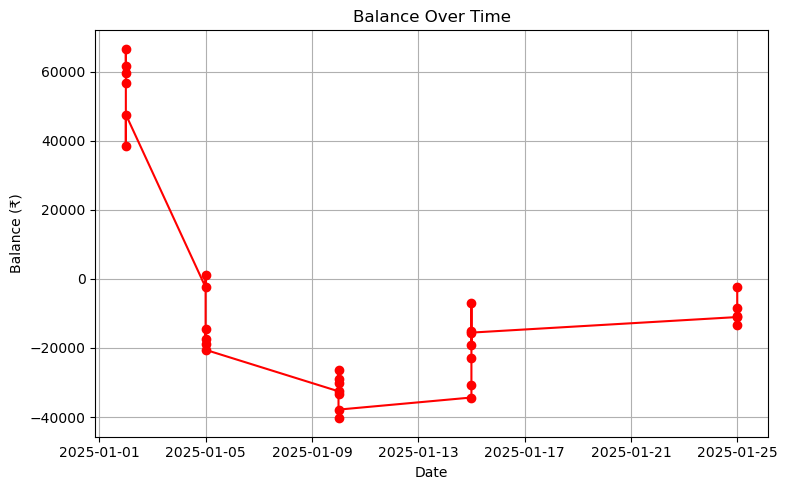

In [9]:
#Balance over time
plt.figure(figsize=(8, 5))
plt.plot(df['Date'], df['Balance'], marker='o', color='red')
plt.title("Balance Over Time")
plt.xlabel("Date")
plt.ylabel("Balance (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
debit_df = df[df['Transaction Type'] == 'Debit']
spending = debit_df.groupby("Category")["Amount"].sum()
print (spending)

Category
Bills        43629
Food         12800
Shopping     16500
Utilities    12000
Name: Amount, dtype: int64


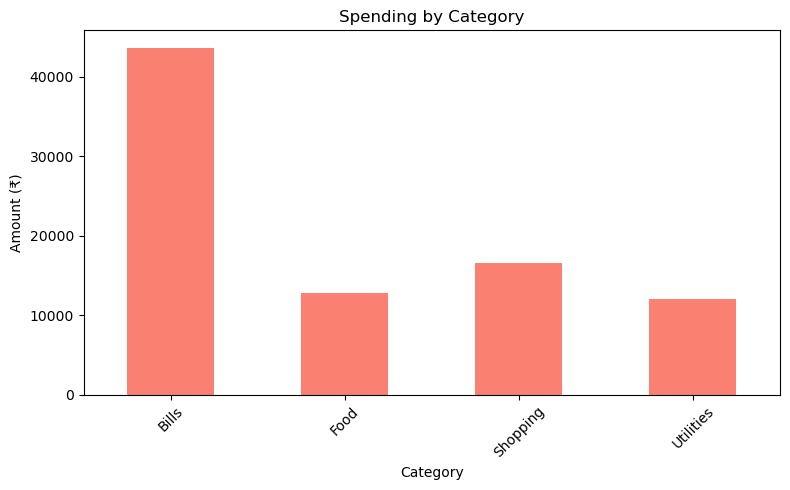

In [11]:
plt.figure(figsize=(8, 5))
spending.plot(kind='bar', color='salmon')
plt.title("Spending by Category")
plt.ylabel("Amount (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
#Monthly Credit & Debit

monthly_summary = df.groupby(['Month', 'Transaction Type'])['Amount'].sum().unstack().fillna(0)

#unstack means cridit values assign cridit and debit valiues assign debit values
#fillna means that month no tranction of credit or debit then assign value is zero
print (monthly_summary)

Transaction Type  Credit  Debit
Month                          
2025-01           144500  84929


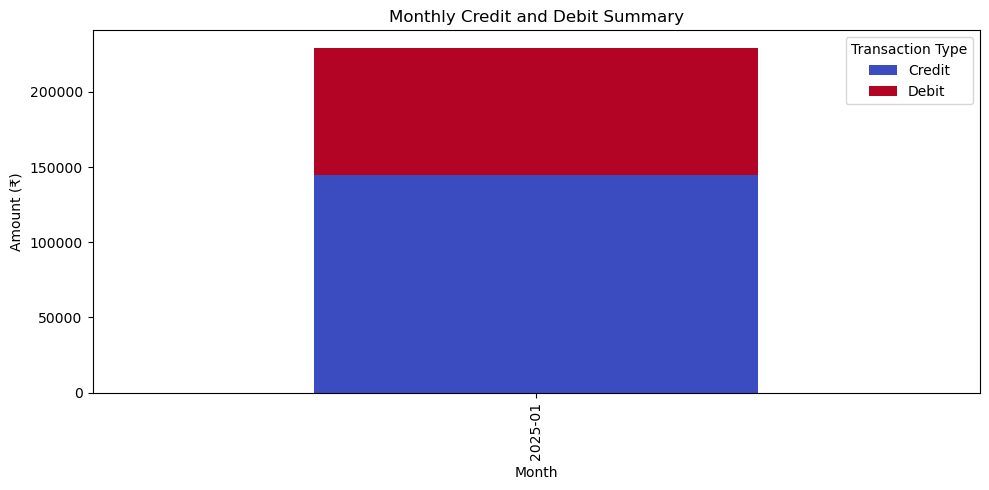

In [13]:
monthly_summary.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='coolwarm')
plt.title("Monthly Credit and Debit Summary")
plt.ylabel("Amount (₹)")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [65]:
#Categorize Spending 
df = pd.read_csv("Bank Transaction Analysis jan Project.csv")
def categorize(desc):
    if "Tea Boy - Foods" in desc or"Food & Snacks shop" in desc or "Fatakpay - Loan APK" in desc :
        return "Bills"
    elif "Grocery" in desc or "Swiggy" in desc:
        return "Food"
    elif "Online Shopping" in desc or "Cloths Shops" in desc:
        return "Shopping"
    elif "Electricity Bill" in desc or"Bakery" in desc:
        return "Bills"
    
    else:
        return "Other"

df['Category'] = df['Description'].apply(categorize)

print(df[['Description', 'Category']])

            Description  Category
0                Salary     Other
1               Grocery      Food
2      Electricity Bill     Bills
3       Online Shopping  Shopping
4                 Bonus     Other
5                Swiggy      Food
6                Bakery     Bills
7          Cloths Shops  Shopping
8       Tea Boy - Foods     Bills
9    Food & Snacks shop     Bills
10             Flipkart     Other
11     Swiggy - Partner      Food
12  Fatakpay - Loan APK     Bills
13                Bonus     Other
14               Swiggy      Food
15               Bakery     Bills
16               Salary     Other
17              Grocery      Food
18     Electricity Bill     Bills
19      Online Shopping  Shopping
20                Bonus     Other
21               Swiggy      Food
22               Bakery     Bills
23         Cloths Shops  Shopping
24      Tea Boy - Foods     Bills
25   Food & Snacks shop     Bills
26             Flipkart     Other
27     Swiggy - Partner      Food
28  Fatakpay -

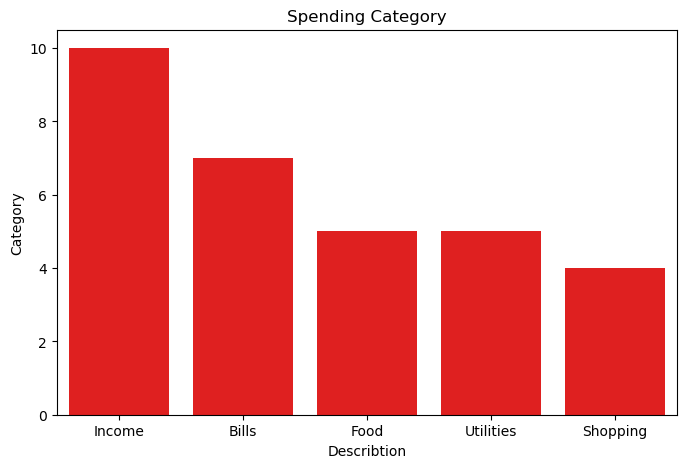

In [14]:
category_counts = df['Category'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values,color = 'red')
plt.xlabel("Describtion")
plt.ylabel("Category")
plt.title('Spending Category')
plt.show()

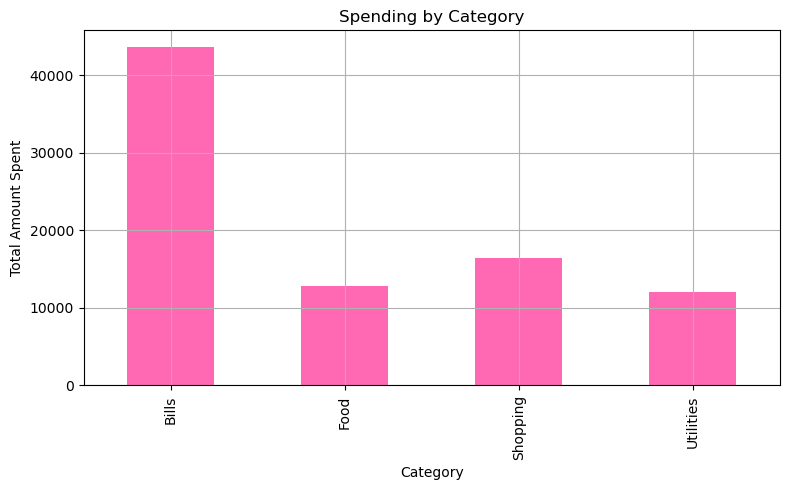

In [15]:
# Grouping the spending data
spending = debit_df.groupby("Category")["Amount"].sum()

# Plotting
plt.figure(figsize=(8, 5))
spending.plot(kind='bar', color='hotpink')
plt.xlabel("Category")
plt.ylabel("Total Amount Spent")
plt.title("Spending by Category")
plt.grid(True)
plt.tight_layout()
plt.show()